# K Nearest neighbour Classification

In [1]:
# import libraries
import pandas as pd # linear algebra
import numpy as np  # data processing
import matplotlib.pyplot as plt  # for data visualization purposes
import seaborn as sns # for data visualization
%matplotlib inline


In [2]:
import warnings

warnings.filterwarnings('ignore')

#Import dataset

In [3]:
# data =breast-cancer-wisconsin.data.txt'

df = pd.read_csv('/content/sample2.csv',header=None)

#Exploratory data analysis

In [4]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10
0,0,1,2,3,4,5,6,7,8,9,10
1,1000025,5,1,1,1,2,1,3,1,1,2
2,1002945,5,4,4,5,7,10,3,2,1,2
3,1015425,3,1,1,1,2,2,3,1,1,2
4,1016277,6,8,8,1,3,4,3,7,1,2


In [5]:
df.tail()

,0,1,2,3,4,5,6,7,8,9,10
695,776715,3,1,1,1,3,2,1,1,1,2
696,841769,2,1,1,1,2,1,1,1,1,2
697,888820,5,10,10,3,7,3,8,10,2,4
698,897471,4,8,6,4,3,4,10,6,1,4
699,897471,4,8,8,5,4,5,10,4,1,4


In [6]:
# view dimensions of dataset

df.shape

(700, 11)

In [7]:
col_names = ['Id', 'Clump_thickness', 'Uniformity_Cell_Size', 'Uniformity_Cell_Shape', 'Marginal_Adhesion', 
             'Single_Epithelial_Cell_Size', 'Bare_Nuclei', 'Bland_Chromatin', 'Normal_Nucleoli', 'Mitoses', 'Class']

df.columns = col_names

df.columns

Index(['Id', 'Clump_thickness', 'Uniformity_Cell_Size',
       'Uniformity_Cell_Shape', 'Marginal_Adhesion',
       'Single_Epithelial_Cell_Size', 'Bare_Nuclei', 'Bland_Chromatin',
       'Normal_Nucleoli', 'Mitoses', 'Class'],
      dtype='object')

In [8]:
# let's agian preview the dataset

df.head()

,Id,Clump_thickness,Uniformity_Cell_Size,Uniformity_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,0,1,2,3,4,5,6,7,8,9,10
1,1000025,5,1,1,1,2,1,3,1,1,2
2,1002945,5,4,4,5,7,10,3,2,1,2
3,1015425,3,1,1,1,2,2,3,1,1,2
4,1016277,6,8,8,1,3,4,3,7,1,2


In [9]:
# drop Id column from dataset

df.drop('Id', axis=1, inplace=True)

In [10]:
df.head()

,Clump_thickness,Uniformity_Cell_Size,Uniformity_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,1,2,3,4,5,6,7,8,9,10
1,5,1,1,1,2,1,3,1,1,2
2,5,4,4,5,7,10,3,2,1,2
3,3,1,1,1,2,2,3,1,1,2
4,6,8,8,1,3,4,3,7,1,2


In [11]:
# view summary of dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Clump_thickness              700 non-null    int64 
 1   Uniformity_Cell_Size         700 non-null    int64 
 2   Uniformity_Cell_Shape        700 non-null    int64 
 3   Marginal_Adhesion            700 non-null    int64 
 4   Single_Epithelial_Cell_Size  700 non-null    int64 
 5   Bare_Nuclei                  700 non-null    object
 6   Bland_Chromatin              700 non-null    int64 
 7   Normal_Nucleoli              700 non-null    int64 
 8   Mitoses                      700 non-null    int64 
 9   Class                        700 non-null    int64 
dtypes: int64(9), object(1)
memory usage: 54.8+ KB


#Frequency distribution of values in variables

In [12]:
for var in df.columns:
    
    print(df[var].value_counts())

1     146
5     130
3     108
4      80
10     69
2      50
8      46
6      34
7      23
9      14
Name: Clump_thickness, dtype: int64
1     384
10     67
3      52
2      46
4      40
5      30
8      29
6      27
7      19
9       6
Name: Uniformity_Cell_Size, dtype: int64
1     353
2      59
10     58
3      57
4      44
5      34
6      30
7      30
8      28
9       7
Name: Uniformity_Cell_Shape, dtype: int64
1     407
3      58
2      58
10     55
4      34
8      25
5      23
6      22
7      13
9       5
Name: Marginal_Adhesion, dtype: int64
2     386
3      72
4      48
1      47
6      41
5      40
10     31
8      21
7      12
9       2
Name: Single_Epithelial_Cell_Size, dtype: int64
1     402
10    132
2      30
5      30
3      28
8      21
4      19
?      16
9       9
7       8
6       5
Name: Bare_Nuclei, dtype: int64
2     166
3     165
1     152
7      74
4      40
5      34
8      28
10     20
9      11
6      10
Name: Bland_Chromatin, dtype: int64
1     443
10     

#Convert data type of Bare_Nuclei to integer

In [13]:
df['Bare_Nuclei'] = pd.to_numeric(df['Bare_Nuclei'], errors='coerce')
df.head()

,Clump_thickness,Uniformity_Cell_Size,Uniformity_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,1,2,3,4,5,6.0,7,8,9,10
1,5,1,1,1,2,1.0,3,1,1,2
2,5,4,4,5,7,10.0,3,2,1,2
3,3,1,1,1,2,2.0,3,1,1,2
4,6,8,8,1,3,4.0,3,7,1,2


In [14]:
df.tail()

,Clump_thickness,Uniformity_Cell_Size,Uniformity_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
695,3,1,1,1,3,2.0,1,1,1,2
696,2,1,1,1,2,1.0,1,1,1,2
697,5,10,10,3,7,3.0,8,10,2,4
698,4,8,6,4,3,4.0,10,6,1,4
699,4,8,8,5,4,5.0,10,4,1,4


#Check data types of columns of datafram

In [15]:
df.dtypes

Clump_thickness                  int64
Uniformity_Cell_Size             int64
Uniformity_Cell_Shape            int64
Marginal_Adhesion                int64
Single_Epithelial_Cell_Size      int64
Bare_Nuclei                    float64
Bland_Chromatin                  int64
Normal_Nucleoli                  int64
Mitoses                          int64
Class                            int64
dtype: object

#Missing values in variables

In [16]:
# check missing values in variables

df.isnull().sum()

Clump_thickness                 0
Uniformity_Cell_Size            0
Uniformity_Cell_Shape           0
Marginal_Adhesion               0
Single_Epithelial_Cell_Size     0
Bare_Nuclei                    16
Bland_Chromatin                 0
Normal_Nucleoli                 0
Mitoses                         0
Class                           0
dtype: int64

In [17]:
# check `na` values in the dataframe

df.isna().sum()

Clump_thickness                 0
Uniformity_Cell_Size            0
Uniformity_Cell_Shape           0
Marginal_Adhesion               0
Single_Epithelial_Cell_Size     0
Bare_Nuclei                    16
Bland_Chromatin                 0
Normal_Nucleoli                 0
Mitoses                         0
Class                           0
dtype: int64

In [18]:
# check frequency distribution of `Bare_Nuclei` column

df['Bare_Nuclei'].value_counts()

1.0     402
10.0    132
2.0      30
5.0      30
3.0      28
8.0      21
4.0      19
9.0       9
7.0       8
6.0       5
Name: Bare_Nuclei, dtype: int64

In [19]:
# check unique values in `Bare_Nuclei` column

df['Bare_Nuclei'].unique()

array([ 6.,  1., 10.,  2.,  4.,  3.,  9.,  7., nan,  5.,  8.])

In [20]:
# check for nan values in `Bare_Nuclei` column

df['Bare_Nuclei'].isna().sum()

16

#check frequency distribution of target variable class

In [21]:
# view frequency distribution of values in `Class` variable

df['Class'].value_counts()

2     458
4     241
10      1
Name: Class, dtype: int64

#check percentage of frequency distribution of Class

In [22]:
# view percentage of frequency distribution of values in `Class` variable

df['Class'].value_counts()/np.float(len(df))

2     0.654286
4     0.344286
10    0.001429
Name: Class, dtype: float64

#Outliers in numerical variables

In [23]:
# view summary statistics in numerical variables

print(round(df.describe(),2))

       Clump_thickness  Uniformity_Cell_Size  Uniformity_Cell_Shape  \
count           700.00                700.00                 700.00   
mean              4.41                  3.13                   3.21   
std               2.82                  3.05                   2.97   
min               1.00                  1.00                   1.00   
25%               2.00                  1.00                   1.00   
50%               4.00                  1.00                   1.00   
75%               6.00                  5.00                   5.00   
max              10.00                 10.00                  10.00   

       Marginal_Adhesion  Single_Epithelial_Cell_Size  Bare_Nuclei  \
count             700.00                       700.00       684.00   
mean                2.81                         3.22         3.55   
std                 2.85                         2.21         3.64   
min                 1.00                         1.00         1.00   
25%       

# Data Visualization

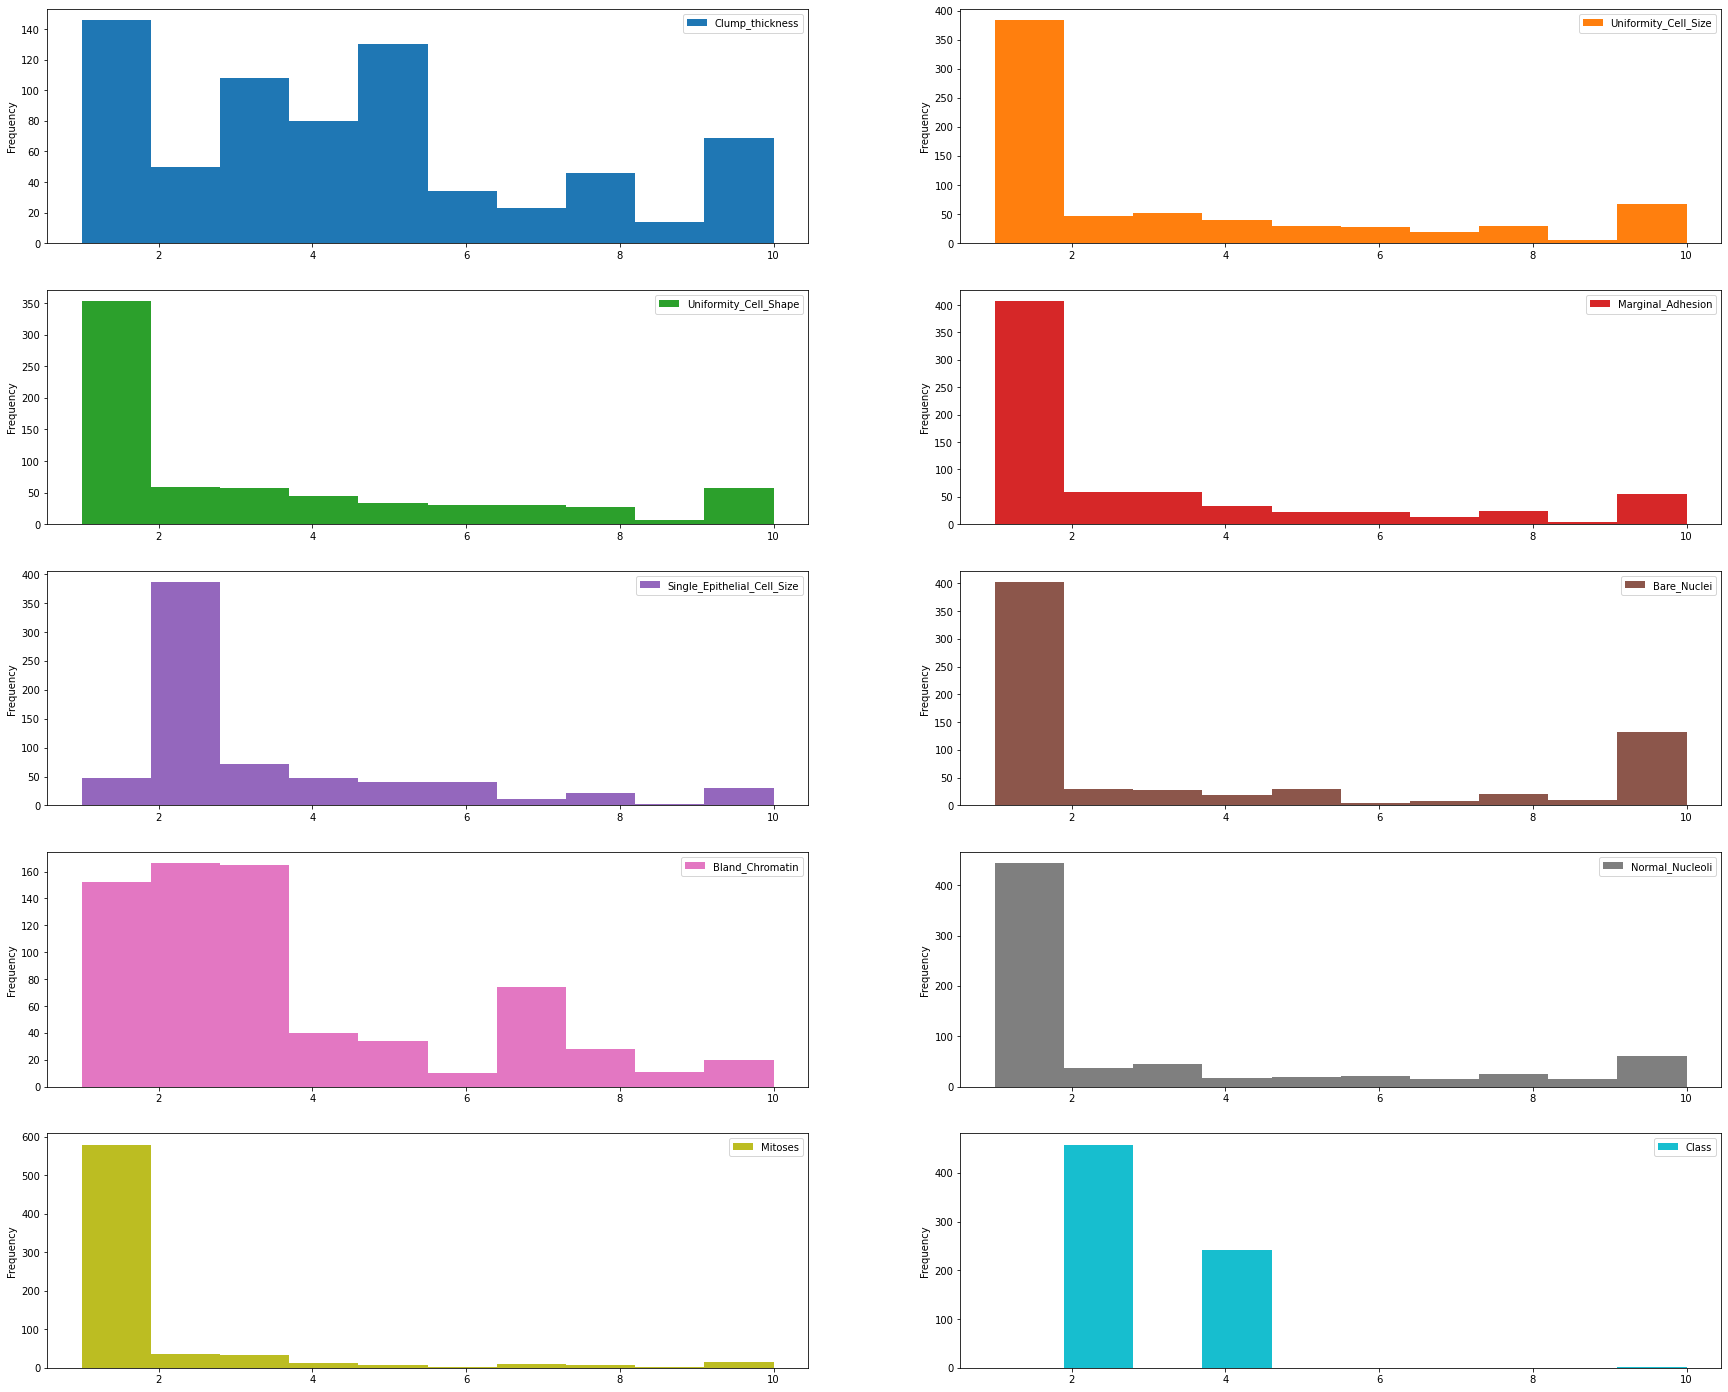

In [24]:
# plot histograms of the variables


plt.rcParams['figure.figsize']=(30,25)

df.plot(kind='hist', bins=10, subplots=True, layout=(5,2), sharex=False, sharey=False)

plt.show()

#Multivariate plots

In [25]:
#Estimating correlation coefficients
correlation = df.corr()

In [26]:
correlation['Class'].sort_values(ascending=False)

Class                          1.000000
Bare_Nuclei                    0.796562
Uniformity_Cell_Shape          0.785647
Uniformity_Cell_Size           0.781395
Bland_Chromatin                0.740839
Normal_Nucleoli                0.700269
Clump_thickness                0.674021
Marginal_Adhesion              0.673434
Single_Epithelial_Cell_Size    0.663846
Mitoses                        0.446051
Name: Class, dtype: float64

#Discover patterns and relationships
## 1Correlation Heat Map

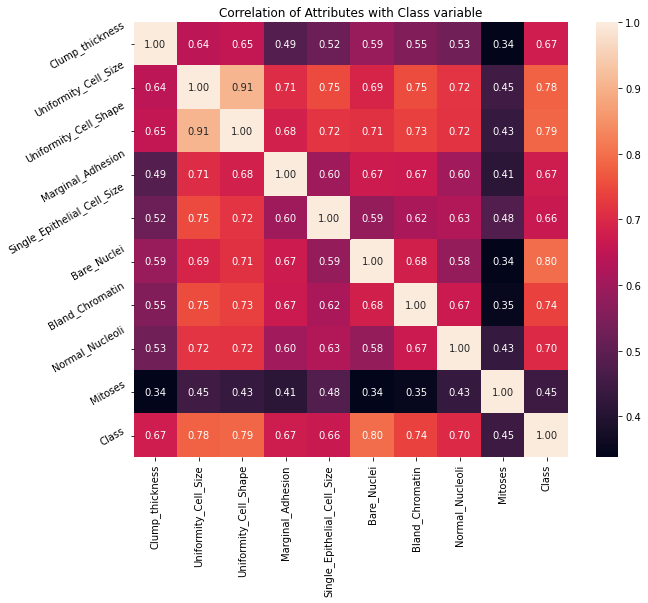

In [27]:
plt.figure(figsize=(10,8))
plt.title('Correlation of Attributes with Class variable')
a = sns.heatmap(correlation, square=True, annot=True, fmt='.2f', linecolor='white')
a.set_xticklabels(a.get_xticklabels(), rotation=90)
a.set_yticklabels(a.get_yticklabels(), rotation=30)           
plt.show()

# Declare feature vector and target variable

In [28]:
X = df.drop(['Class'], axis=1)

y = df['Class']

#Split data into separate training and test set

In [29]:
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [30]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((560, 9), (140, 9))

#Feature Engineering

In [31]:
# check data types in X_train

X_train.dtypes

Clump_thickness                  int64
Uniformity_Cell_Size             int64
Uniformity_Cell_Shape            int64
Marginal_Adhesion                int64
Single_Epithelial_Cell_Size      int64
Bare_Nuclei                    float64
Bland_Chromatin                  int64
Normal_Nucleoli                  int64
Mitoses                          int64
dtype: object

#Engineering missing values in variables

In [32]:
# check missing values in numerical variables in X_train

X_train.isnull().sum()

Clump_thickness                 0
Uniformity_Cell_Size            0
Uniformity_Cell_Shape           0
Marginal_Adhesion               0
Single_Epithelial_Cell_Size     0
Bare_Nuclei                    15
Bland_Chromatin                 0
Normal_Nucleoli                 0
Mitoses                         0
dtype: int64

In [33]:
# check missing values in numerical variables in X_test

X_test.isnull().sum()


Clump_thickness                0
Uniformity_Cell_Size           0
Uniformity_Cell_Shape          0
Marginal_Adhesion              0
Single_Epithelial_Cell_Size    0
Bare_Nuclei                    1
Bland_Chromatin                0
Normal_Nucleoli                0
Mitoses                        0
dtype: int64

In [34]:
# print percentage of missing values in the numerical variables in training set

for col in X_train.columns:
    if X_train[col].isnull().mean()>0:
        print(col, round(X_train[col].isnull().mean(),4))

Bare_Nuclei 0.0268


In [35]:
# impute missing values in X_train and X_test with respective column median in X_train

for df1 in [X_train, X_test]:
    for col in X_train.columns:
        col_median=X_train[col].median()
        df1[col].fillna(col_median, inplace=True)           
      

In [36]:
# check again missing values in numerical variables in X_train

X_train.isnull().sum()

Clump_thickness                0
Uniformity_Cell_Size           0
Uniformity_Cell_Shape          0
Marginal_Adhesion              0
Single_Epithelial_Cell_Size    0
Bare_Nuclei                    0
Bland_Chromatin                0
Normal_Nucleoli                0
Mitoses                        0
dtype: int64

In [37]:
# check missing values in numerical variables in X_test

X_test.isnull().sum()

Clump_thickness                0
Uniformity_Cell_Size           0
Uniformity_Cell_Shape          0
Marginal_Adhesion              0
Single_Epithelial_Cell_Size    0
Bare_Nuclei                    0
Bland_Chromatin                0
Normal_Nucleoli                0
Mitoses                        0
dtype: int64

In [38]:
X_train.head()

,Clump_thickness,Uniformity_Cell_Size,Uniformity_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses
45,10,10,10,4,8,1.0,8,10,1
285,7,4,5,10,2,10.0,3,8,2
62,1,1,1,1,2,2.0,2,1,1
386,3,3,2,2,3,1.0,1,2,3
668,3,1,1,1,2,1.0,3,1,1


In [39]:
X_test.head()

,Clump_thickness,Uniformity_Cell_Size,Uniformity_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses
306,10,8,4,4,4,10.0,3,10,4
604,5,4,6,8,4,1.0,8,10,1
40,2,5,3,3,6,7.0,7,5,1
493,4,1,1,1,1,1.0,2,1,1
14,1,1,1,1,2,3.0,3,1,1


# Feature Scaling

In [40]:
cols = X_train.columns
cols

Index(['Clump_thickness', 'Uniformity_Cell_Size', 'Uniformity_Cell_Shape',
       'Marginal_Adhesion', 'Single_Epithelial_Cell_Size', 'Bare_Nuclei',
       'Bland_Chromatin', 'Normal_Nucleoli', 'Mitoses'],
      dtype='object')

In [41]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [42]:
X_train = pd.DataFrame(X_train, columns=[cols])
X_test = pd.DataFrame(X_test, columns=[cols])
X_train.head()

,Clump_thickness,Uniformity_Cell_Size,Uniformity_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses
0,2.019570,2.217179,2.274843,0.405549,2.146338,-0.679511,1.893813,2.332231,-0.352762
1,0.941439,0.281181,0.606982,2.476439,-0.550631,1.838677,-0.166279,1.676748,0.199045
2,-1.214822,-0.686818,-0.727307,-0.629896,-0.550631,-0.399712,-0.578297,-0.617441,-0.352762
3,-0.496068,-0.041486,-0.393734,-0.284747,-0.101136,-0.679511,-0.990315,-0.289700,0.750852
4,-0.496068,-0.686818,-0.727307,-0.629896,-0.550631,-0.679511,-0.166279,-0.617441,-0.352762


#Fit K Neighbours Classifier to the training eet

In [43]:

# import KNeighbors ClaSSifier from sklearn
from sklearn.neighbors import KNeighborsClassifier


# instantiate the model
knn = KNeighborsClassifier(n_neighbors=3)


# fit the model to the training set
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

#Predict test-set results

In [44]:
y_pred = knn.predict(X_test)

y_pred

array([4, 4, 2, 2, 2, 2, 4, 2, 4, 2, 2, 2, 2, 4, 4, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 4, 2, 4, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 4, 4, 2, 2, 2, 2, 4,
       2, 2, 2, 4, 2, 4, 2, 2, 2, 4, 2, 2, 4, 2, 2, 2, 2, 4, 2, 4, 4, 2,
       2, 2, 2, 4, 4, 2, 4, 4, 2, 4, 2, 4, 4, 4, 2, 4, 4, 4, 2, 4, 2, 2,
       2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 4, 4, 2, 2, 2, 2, 4, 2, 4, 2, 2, 2,
       4, 4, 4, 4, 2, 2, 4, 4, 4, 2, 4, 4, 2, 2, 2, 4, 4, 2, 2, 4, 4, 2,
       2, 4, 2, 4, 2, 2, 2, 4])

##predict_proba method

In [45]:
# probability of getting output as 2 - benign cancer

knn.predict_proba(X_test)[:,0]

array([0.        , 0.33333333, 0.66666667, 1.        , 1.        ,
       1.        , 0.        , 1.        , 0.        , 1.        ,
       1.        , 1.        , 1.        , 0.33333333, 0.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 0.        ,
       1.        , 0.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 0.33333333, 1.        ,
       1.        , 1.        , 0.        , 0.33333333, 1.        ,
       1.        , 1.        , 1.        , 0.        , 1.        ,
       1.        , 1.        , 0.        , 1.        , 0.        ,
       1.        , 1.        , 1.        , 0.        , 1.        ,
       1.        , 0.        , 1.        , 1.        , 1.        ,
       1.        , 0.        , 1.        , 0.        , 0.33333333,
       1.        , 1.        , 1.        , 1.        , 0.        ,
       0.        , 1.        , 0.        , 0.        , 1.     

In [46]:
# probability of getting output as 4 - malignant cancer

knn.predict_proba(X_test)[:,1]

array([1.        , 0.66666667, 0.33333333, 0.        , 0.        ,
       0.        , 1.        , 0.        , 1.        , 0.        ,
       0.        , 0.        , 0.        , 0.66666667, 1.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 1.        ,
       0.        , 1.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.66666667, 0.        ,
       0.        , 0.        , 1.        , 0.66666667, 0.        ,
       0.        , 0.        , 0.        , 1.        , 0.        ,
       0.        , 0.        , 1.        , 0.        , 1.        ,
       0.        , 0.        , 0.        , 1.        , 0.        ,
       0.        , 1.        , 0.        , 0.        , 0.        ,
       0.        , 1.        , 0.        , 1.        , 0.66666667,
       0.        , 0.        , 0.        , 0.        , 1.        ,
       1.        , 0.        , 1.        , 1.        , 0.     

#Check accuracy score

In [47]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score: 0.9786


##Compare the train-set and test-set accuracy

In [48]:
y_pred_train = knn.predict(X_train)

In [49]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.9786


##Check for overfitting and underfitting

In [50]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(knn.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(knn.score(X_test, y_test)))

Training set score: 0.9786
Test set score: 0.9786


##Compare model accuracy with null accuracy

In [51]:
# check class distribution in test set

y_test.value_counts()

2    87
4    53
Name: Class, dtype: int64

In [52]:
# check null accuracy score

null_accuracy = (85/(85+55))

print('Null accuracy score: {0:0.4f}'. format(null_accuracy))

Null accuracy score: 0.6071


#Rebuild kNN Classification model using different values of k

### 0.1Rebuild kNN Classification model using k=5


In [53]:
# instantiate the model with k=5
knn_5 = KNeighborsClassifier(n_neighbors=5)


# fit the model to the training set
knn_5.fit(X_train, y_train)


# predict on the test-set
y_pred_5 = knn_5.predict(X_test)


print('Model accuracy score with k=5 : {0:0.4f}'. format(accuracy_score(y_test, y_pred_5)))

Model accuracy score with k=5 : 0.9786


### 0.2Rebuild kNN Classification model using k=6

In [54]:
# instantiate the model with k=6
knn_6 = KNeighborsClassifier(n_neighbors=6)


# fit the model to the training set
knn_6.fit(X_train, y_train)


# predict on the test-set
y_pred_6 = knn_6.predict(X_test)


print('Model accuracy score with k=6 : {0:0.4f}'. format(accuracy_score(y_test, y_pred_6)))

Model accuracy score with k=6 : 0.9714


### 0.3Rebuild kNN Classification model using k=7

In [55]:
# instantiate the model with k=7
knn_7 = KNeighborsClassifier(n_neighbors=7)


# fit the model to the training set
knn_7.fit(X_train, y_train)


# predict on the test-set
y_pred_7 = knn_7.predict(X_test)


print('Model accuracy score with k=7 : {0:0.4f}'. format(accuracy_score(y_test, y_pred_7)))

Model accuracy score with k=7 : 0.9714


### 0.4Rebuild kNN Classification model using k=8

In [56]:
# instantiate the model with k=8
knn_8 = KNeighborsClassifier(n_neighbors=8)


# fit the model to the training set
knn_8.fit(X_train, y_train)


# predict on the test-set
y_pred_8 = knn_8.predict(X_test)


print('Model accuracy score with k=8 : {0:0.4f}'. format(accuracy_score(y_test, y_pred_8)))

Model accuracy score with k=8 : 0.9714



### 0.5Rebuild kNN Classification model using k=9

In [57]:
# instantiate the model with k=9
knn_9 = KNeighborsClassifier(n_neighbors=9)


# fit the model to the training set
knn_9.fit(X_train, y_train)


# predict on the test-set
y_pred_9 = knn_9.predict(X_test)


print('Model accuracy score with k=9 : {0:0.4f}'. format(accuracy_score(y_test, y_pred_9)))

Model accuracy score with k=9 : 0.9714


#Confusion matrix 



In [58]:
# Print the Confusion Matrix with k =3 and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[86  1]
 [ 2 51]]

True Positives(TP) =  86

True Negatives(TN) =  51

False Positives(FP) =  1

False Negatives(FN) =  2


In [59]:
# Print the Confusion Matrix with k =7 and slice it into four pieces

cm_7 = confusion_matrix(y_test, y_pred_7)

print('Confusion matrix\n\n', cm_7)

print('\nTrue Positives(TP) = ', cm_7[0,0])

print('\nTrue Negatives(TN) = ', cm_7[1,1])

print('\nFalse Positives(FP) = ', cm_7[0,1])

print('\nFalse Negatives(FN) = ', cm_7[1,0])

Confusion matrix

 [[86  1]
 [ 3 50]]

True Positives(TP) =  86

True Negatives(TN) =  50

False Positives(FP) =  1

False Negatives(FN) =  3


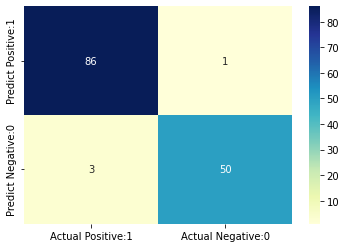

In [60]:
# visualize confusion matrix with seaborn heatmap

plt.figure(figsize=(6,4))

cm_matrix = pd.DataFrame(data=cm_7, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

#Classification metrices

In [61]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_7))


              precision    recall  f1-score   support

           2       0.97      0.99      0.98        87
           4       0.98      0.94      0.96        53

    accuracy                           0.97       140
   macro avg       0.97      0.97      0.97       140
weighted avg       0.97      0.97      0.97       140



### 0.1 Classification accuracy

In [62]:
TP = cm_7[0,0]
TN = cm_7[1,1]
FP = cm_7[0,1]
FN = cm_7[1,0]


In [63]:
# print classification accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.9714


### 0.2 Classification error

In [64]:
# print classification error

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.0286


### 0.3 Precision

In [65]:
# print precision score

precision = TP / float(TP + FP)


print('Precision : {0:0.4f}'.format(precision))

Precision : 0.9885


### 0.4 Recall

In [66]:
recall = TP / float(TP + FN)

print('Recall or Sensitivity : {0:0.4f}'.format(recall))

Recall or Sensitivity : 0.9663


### 0.4 True Positive Rate

In [67]:
#True Positive Rate is synonymous with Recall
true_positive_rate = TP / float(TP + FN)


print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))


True Positive Rate : 0.9663


### 0.5False Positive Rate

In [68]:
false_positive_rate = FP / float(FP + TN)


print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))

False Positive Rate : 0.0196


### 0.6 Specificity

In [69]:
specificity = TN / (TN + FP)

print('Specificity : {0:0.4f}'.format(specificity))

Specificity : 0.9804


### 0.7 Adjusting the classification threshold level

In [70]:
# print the first 10 predicted probabilities of two classes- 2 and 4

y_pred_prob = knn.predict_proba(X_test)[0:10]

y_pred_prob

array([[0.        , 1.        , 0.        ],
       [0.33333333, 0.66666667, 0.        ],
       [0.66666667, 0.33333333, 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [0.        , 1.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [0.        , 1.        , 0.        ],
       [1.        , 0.        , 0.        ]])

### 0.8 Observations

In [74]:
# print the first 10 predicted probabilities for class 4 - Probability of malignant cancer

knn.predict_proba(X_test)[0:10, 1]

array([1.        , 0.66666667, 0.33333333, 0.        , 0.        ,
       0.        , 1.        , 0.        , 1.        , 0.        ])

In [79]:
# store the predicted probabilities for class 4 - Probability of malignant cancer

y_pred_1 = knn.predict_proba(X_test)[:, 1]

Text(0, 0.5, 'Frequency')

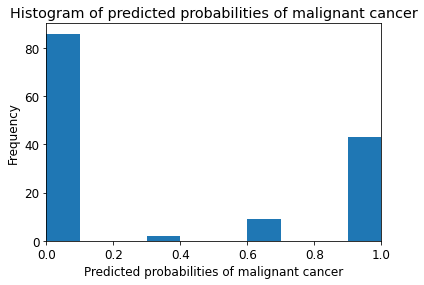

In [80]:
# plot histogram of predicted probabilities


# adjust figure size
plt.figure(figsize=(6,4))


# adjust the font size 
plt.rcParams['font.size'] = 12


# plot histogram with 10 bins
plt.hist(y_pred_1, bins = 10)


# set the title of predicted probabilities
plt.title('Histogram of predicted probabilities of malignant cancer')


# set the x-axis limit
plt.xlim(0,1)


# set the title
plt.xlabel('Predicted probabilities of malignant cancer')
plt.ylabel('Frequency')

#ROC-AUC

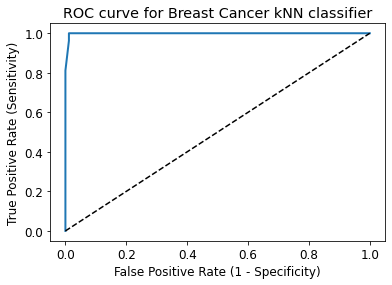

In [81]:
# plot ROC Curve

from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred_1, pos_label=4)

plt.figure(figsize=(6,4))

plt.plot(fpr, tpr, linewidth=2)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12

plt.title('ROC curve for Breast Cancer kNN classifier')

plt.xlabel('False Positive Rate (1 - Specificity)')

plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()

In [82]:
# compute ROC AUC

from sklearn.metrics import roc_auc_score

ROC_AUC = roc_auc_score(y_test, y_pred_1)

print('ROC AUC : {:.4f}'.format(ROC_AUC))

ROC AUC : 0.9987


###Interpretation

In [84]:
# calculate cross-validated ROC AUC 

from sklearn.model_selection import cross_val_score

Cross_validated_ROC_AUC = cross_val_score(knn_7, X_train, y_train, cv=5, scoring='roc_auc').mean()

print('Cross validated ROC AUC : {:.4f}'.format(Cross_validated_ROC_AUC))

Cross validated ROC AUC : nan


#k-fold Cross Validation

In [85]:
# Applying 10-Fold Cross Validation

from sklearn.model_selection import cross_val_score

scores = cross_val_score(knn_7, X_train, y_train, cv = 10, scoring='accuracy')

print('Cross-validation scores:{}'.format(scores))

Cross-validation scores:[0.98214286 1.         0.92857143 1.         0.94642857 0.91071429
 0.96428571 0.94642857 0.96428571 0.96428571]


In [86]:
# compute Average cross-validation score

print('Average cross-validation score: {:.4f}'.format(scores.mean()))

Average cross-validation score: 0.9607


#Results and Conclusion 

1.  In this project, I build a kNN classifier model to classify the patients suffering from breast cancer. The model yields very good performance as indicated by the model accuracy which was found to be 0.9786 with k=7

 2. With k=3, the training-set accuracy score is 0.9821 while the test-set accuracy to be 0.9714. These two values are quite comparable. So, there is no question of overfitting.

 3. I have compared the model accuracy score which is 0.9714 with null accuracy score which is 0.6071. So, we can conclude that our K Nearest Neighbors model is doing a very good job in predicting the class labels
4. Our original model accuracy score with k=3 is 0.9714. Now, we can see that we get same accuracy score of 0.9714 with k=5. But, if we increase the value of k further, this would result in enhanced accuracy. With k=6,7,8 we get accuracy score of 0.9786. So, it results in performance improvement. If we increase k to 9, then accuracy decreases again to 0.9714. So, we can conclude that our optimal value of k is 7.

5. kNN Classification model with k=7 shows more accurate predictions and less number of errors than k=3 model. Hence, we got performance improvement with k=7.

6. ROC AUC of our model approaches towards 1. So, we can conclude that our classifier does a good job in predicting whether it is benign or malignant cancer.

7. Using the mean cross-validation, we can conclude that we expect the model to be around 96.46 % accurate on average.

8. If we look at all the 10 scores produced by the 10-fold cross-validation, we can also conclude that there is a relatively high variance in the accuracy between folds, ranging from 100% accuracy to 87.72% accuracy. So, we can conclude that the model is very dependent on the particular folds used for training, but it also be the consequence of the small size of the dataset.
  

#References 

##The work done in this project is inspired from following books and websites:-




1. Hands on Machine Learning with Scikit-Learn and Tensorflow by Shabaz.
2. Introduction to Machine Learning with Python by Andreas C. Müller and Sarah Guido
3. Udemy course – Machine Learning – A Z by Kirill Eremenko and Hadelin de Ponteves
4. https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm
5. https://www.datacamp.com/community/tutorials/k-nearest-neighbor-classification-scikit-learn
6. http://dataaspirant.com/2016/12/23/k-nearest-neighbor-classifier-intro/
7. https://stackabuse.com/k-nearest-neighbors-algorithm-in-python-and-scikit-learn/
